<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/marko-arce/TALLER/TALLER_EVALUACION_MARKO_ARCE_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving index_1.csv to index_1.csv
Saving index_2.csv to index_2.csv


In [ ]:
import pandas as pd

# Cargar archivos
df1 = pd.read_csv("index_1.csv")
df2 = pd.read_csv("index_2.csv")

# Añadir columna faltante 'card' a df2
df2['card'] = None

# Unir datasets
df = pd.concat([df1, df2], ignore_index=True)

# Convertir columnas de fecha a datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')

# Crear características temporales
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour

# Crear variable objetivo: ventas totales por día
daily_sales = df.groupby("date")["money"].sum().reset_index()
daily_sales.columns = ["date", "cantidad_total_vendida_no_dia"]
df = df.merge(daily_sales, on="date", how="left")

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["cash_type", "coffee_name"], drop_first=True)

# Visualizar primeras filas
df_encoded.head()


,date,datetime,card,money,year,month,day,weekday,hour,cantidad_total_vendida_no_dia,...,coffee_name_Hot milkshake,coffee_name_Irish whiskey,coffee_name_Irish whiskey with milk,coffee_name_Irish with chocolate,coffee_name_Latte,coffee_name_Mochaccino,coffee_name_Super chocolate,coffee_name_Tea,coffee_name_Vanilla coffee,coffee_name_Vanilla with Irish whiskey
0,2024-03-01,2024-03-01 10:15:50.520,ANON-0000-0000-0001,38.7,2024,3,1,4,10,396.3,...,False,False,False,False,True,False,False,False,False,False
1,2024-03-01,2024-03-01 12:19:22.539,ANON-0000-0000-0002,38.7,2024,3,1,4,12,396.3,...,False,False,False,False,False,False,False,False,False,False
2,2024-03-01,2024-03-01 12:20:18.089,ANON-0000-0000-0002,38.7,2024,3,1,4,12,396.3,...,False,False,False,False,False,False,False,False,False,False
3,2024-03-01,2024-03-01 13:46:33.006,ANON-0000-0000-0003,28.9,2024,3,1,4,13,396.3,...,False,False,False,False,False,False,False,False,False,False
4,2024-03-01,2024-03-01 13:48:14.626,ANON-0000-0000-0004,38.7,2024,3,1,4,13,396.3,...,False,False,False,False,True,False,False,False,False,False


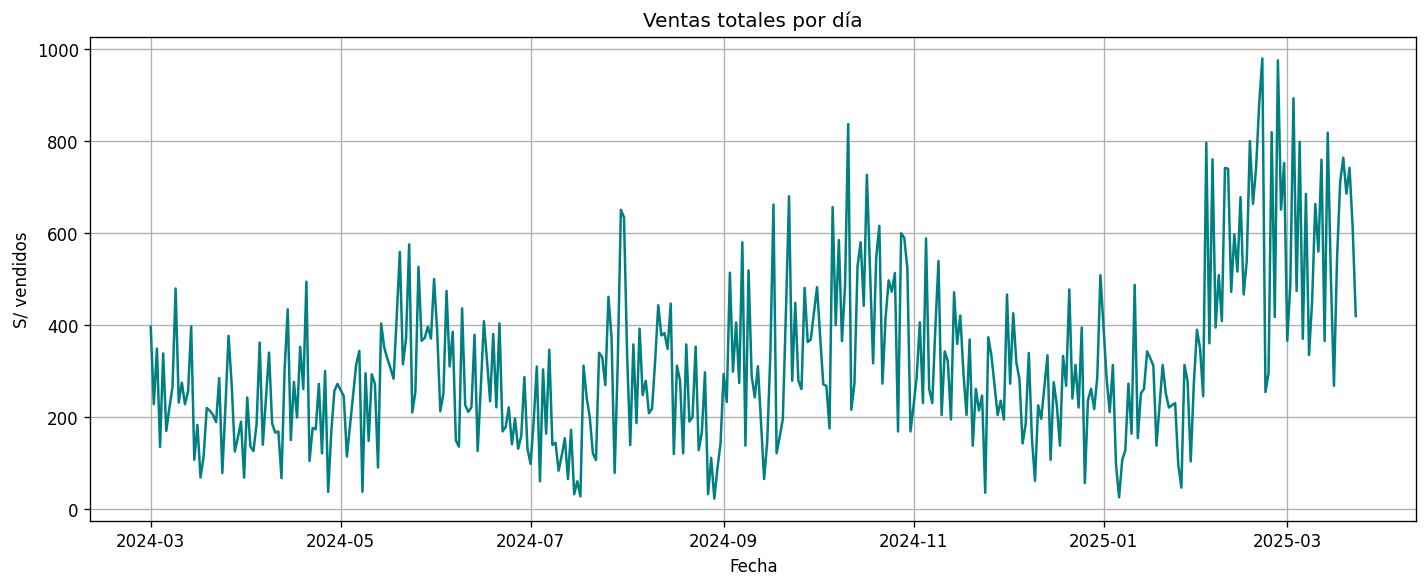

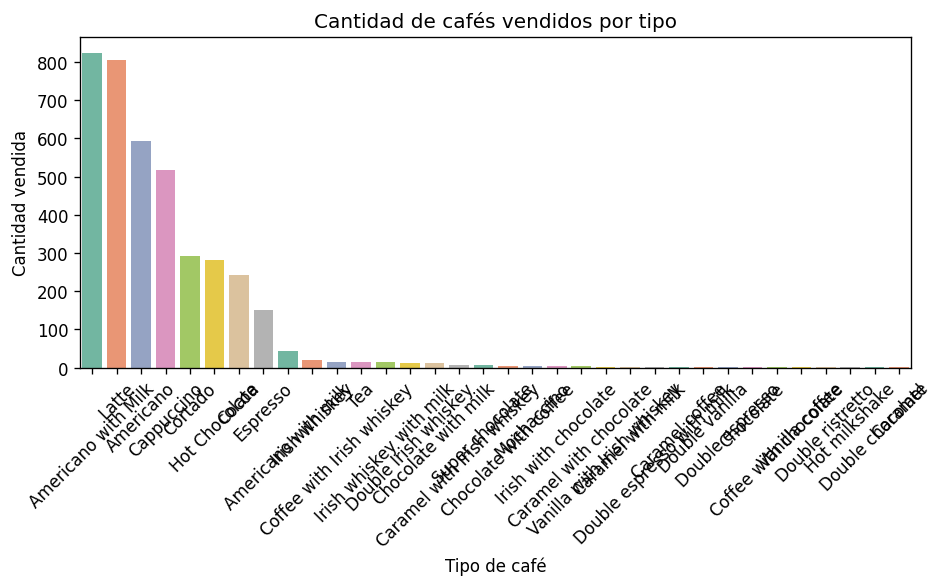

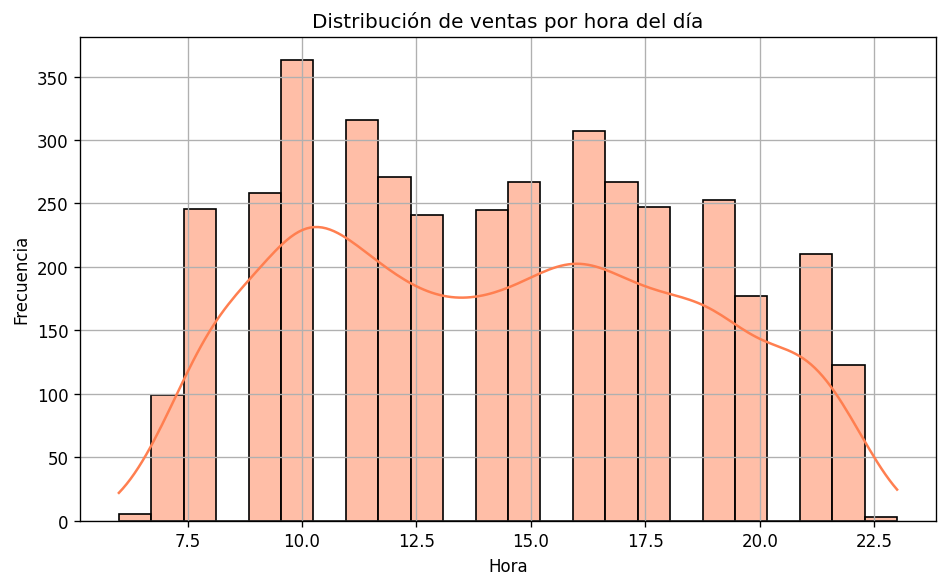

/tmp/ipython-input-21-3933792643.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_weekday, x='weekday', y='money', palette='coolwarm')


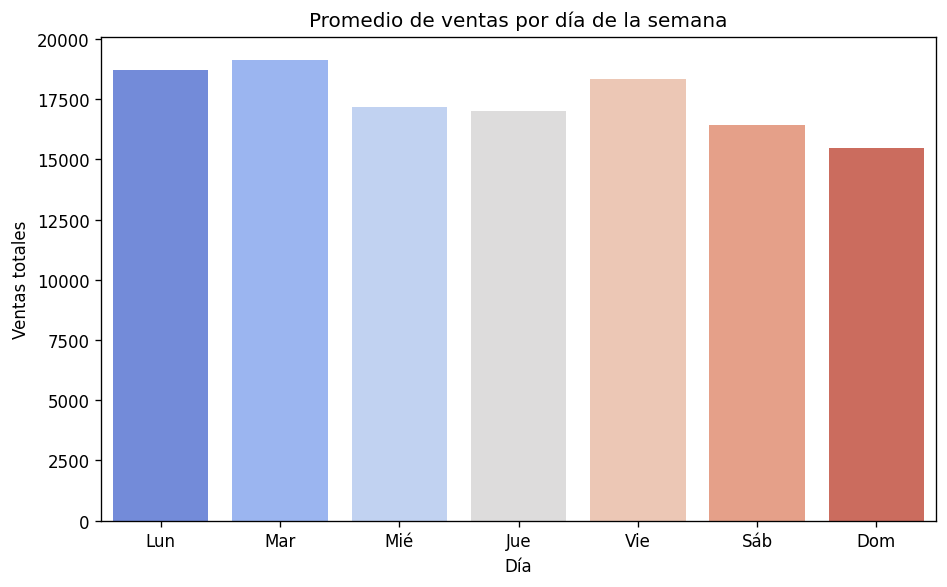

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aumentar resolución de gráficos
plt.rcParams['figure.dpi'] = 120

# ==========================================================
# 1. Ventas totales por día (línea)
# ==========================================================
plt.figure(figsize=(12, 5))
df_daily = df.groupby('date')["money"].sum().reset_index()
sns.lineplot(data=df_daily, x='date', y='money', color='teal')
plt.title("Ventas totales por día")
plt.xlabel("Fecha")
plt.ylabel("S/ vendidos")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================================================
# 2. Conteo de tipos de café vendidos
# ==========================================================
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette="Set2")
plt.title("Cantidad de cafés vendidos por tipo")
plt.xlabel("Tipo de café")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==========================================================
# 3. Distribución de ventas por hora del día
# ==========================================================
plt.figure(figsize=(8, 5))
sns.histplot(df['hour'], bins=24, kde=True, color='coral')
plt.title("Distribución de ventas por hora del día")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================================================
# 4. Promedio de venta por día de la semana
# ==========================================================
df_weekday = df.groupby('weekday')["money"].sum().reset_index()
dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
df_weekday['weekday'] = df_weekday['weekday'].apply(lambda x: dias[x])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_weekday, x='weekday', y='money', palette='coolwarm')
plt.title("Promedio de ventas por día de la semana")
plt.xlabel("Día")
plt.ylabel("Ventas totales")
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# =========================================
# 1. Cargar y agrupar datos por día
# =========================================

df1 = pd.read_csv("index_1.csv")
df2 = pd.read_csv("index_2.csv")
df2["card"] = None
df = pd.concat([df1, df2], ignore_index=True)

df["datetime"] = pd.to_datetime(df["datetime"], format="mixed")
df["date"] = pd.to_datetime(df["date"])

# Agrupación por día
df_grouped = df.groupby("date").agg(
    cantidad_total_vendida_no_dia=("money", "sum"),
    total_transacciones=("money", "count"),
    total_cafes_distintos=("coffee_name", "nunique"),
    year=("datetime", lambda x: x.dt.year.iloc[0]),
    month=("datetime", lambda x: x.dt.month.iloc[0]),
    day=("datetime", lambda x: x.dt.day.iloc[0]),
    weekday=("datetime", lambda x: x.dt.weekday.iloc[0])
).reset_index()

# Agregar variables externas simuladas (opcional)
np.random.seed(42)
df_grouped["feriado"] = np.random.randint(0, 2, len(df_grouped))
df_grouped["promocion"] = np.random.randint(0, 2, len(df_grouped))
df_grouped["evento_local"] = np.random.randint(0, 2, len(df_grouped))
df_grouped["temperatura_media_c"] = np.random.normal(22, 4, len(df_grouped)).round(1)

# =========================================
# 2. Features y objetivo
# =========================================

X = df_grouped.drop(columns=["date", "cantidad_total_vendida_no_dia"])
y = df_grouped["cantidad_total_vendida_no_dia"]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 💾 Guardar el escalador y las columnas usadas
joblib.dump(scaler, 'scaler_total.pkl')
joblib.dump(X.columns.tolist(), 'features_modelo_total.pkl')


# División
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =========================================
# 3. Modelo Keras
# =========================================

model_total = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model_total.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_total = model_total.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# =========================================
# 4. Evaluación
# =========================================

y_pred = model_total.predict(X_test).flatten()

print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R2:", round(r2_score(y_test, y_pred), 4))  # ⬅️ Espera R² > 0.87

# =========================================
# 5. Guardar modelo
# =========================================

model_total.save("modelo_total_ventas.keras")



Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 142916.5625 - mae: 321.0851 - val_loss: 129618.5391 - val_mae: 321.4753
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 131946.9219 - mae: 320.9203 - val_loss: 127072.3438 - val_mae: 317.7125
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 124183.9219 - mae: 309.6020 - val_loss: 120972.5781 - val_mae: 308.6267
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 123103.1328 - mae: 304.8910 - val_loss: 107771.3047 - val_mae: 289.2477
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 99408.1016 - mae: 263.6866 - val_loss: 84854.2266 - val_mae: 253.6249
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83973.3438 - mae: 240.6465 - val_loss: 52081.8594 - val_mae: 193.5301
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 49405.3984 - mae: 178.7695 - val_loss: 21731.3984 - val_mae: 113.6034
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17145.7500 - mae: 102.7462 - val_loss: 1

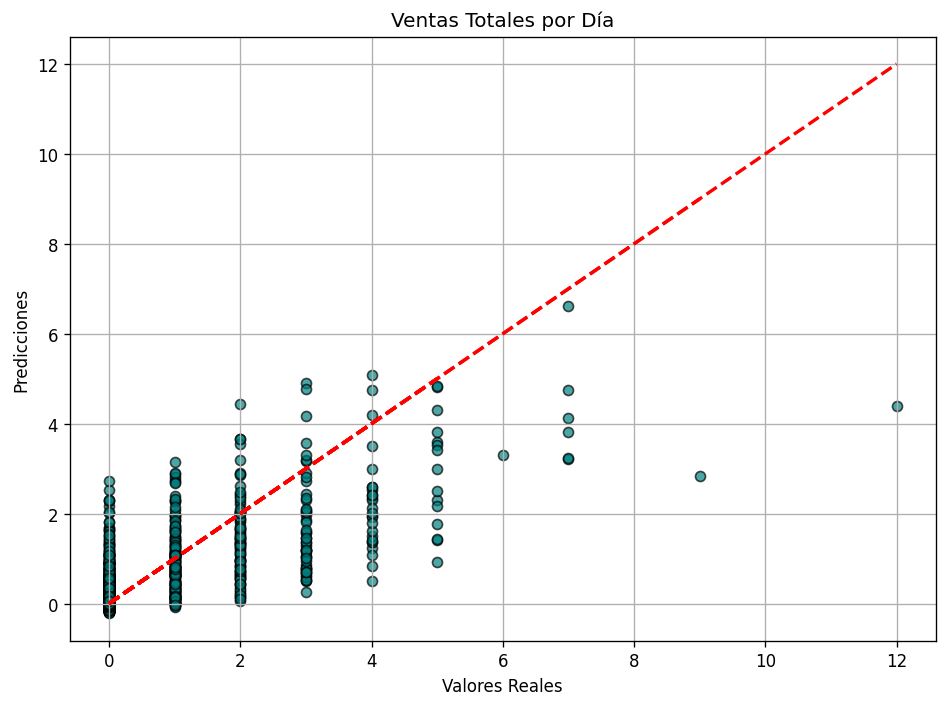

In [ ]:
import matplotlib.pyplot as plt

# ============================
# Gráfico de dispersión
# ============================

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Ventas Totales por Día")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# =============================
# 1. CARGAR DATOS
# =============================

df1 = pd.read_csv("index_1.csv")
df2 = pd.read_csv("index_2.csv")
df2["card"] = None
df = pd.concat([df1, df2], ignore_index=True)

df["datetime"] = pd.to_datetime(df["datetime"], format="mixed")
df["date"] = pd.to_datetime(df["date"])

# =============================
# 2. AGRUPAR VENTAS POR CAFÉ
# =============================

ventas_por_cafe = df.groupby(["date", "coffee_name"])["money"].count().unstack(fill_value=0).reset_index()
coffee_cols = ventas_por_cafe.columns[1:]

# =============================
# 3. CREAR VARIABLES CONTEXTUALES
# =============================

df["hour"] = df["datetime"].dt.hour
df_date = df.groupby("date").agg(
    year=("datetime", lambda x: x.dt.year.iloc[0]),
    month=("datetime", lambda x: x.dt.month.iloc[0]),
    day=("datetime", lambda x: x.dt.day.iloc[0]),
    weekday=("datetime", lambda x: x.dt.weekday.iloc[0]),
    hour_median=("datetime", lambda x: x.dt.hour.median()),
    total_transacciones=("money", "count"),
    ventas_totales=("money", "sum")
).reset_index()

# Simular contexto externo
np.random.seed(42)
df_date["feriado"] = np.random.randint(0, 2, len(df_date))
df_date["promocion"] = np.random.randint(0, 2, len(df_date))
df_date["evento_local"] = np.random.randint(0, 2, len(df_date))
df_date["temperatura_media_c"] = np.random.normal(22, 3, len(df_date)).round(1)

# Tendencia (días desde la primera fecha)
df_date["tendencia_dias"] = (df_date["date"] - df_date["date"].min()).dt.days

# =============================
# 4. MERGE FEATURES + TARGET
# =============================

df_final = ventas_por_cafe.merge(df_date, on="date", how="left").fillna(0)

# =============================
# 5. X (features) / Y (targets)
# =============================

X_cols = ['year', 'month', 'day', 'weekday', 'hour_median', 'feriado',
          'promocion', 'evento_local', 'temperatura_media_c',
          'total_transacciones', 'ventas_totales', 'tendencia_dias']
X = df_final[X_cols]
y = df_final[coffee_cols]

# =============================
# 6. ESCALADO Y DIVISIÓN
# =============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler_multi.pkl")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =============================
# 7. MODELO KERAS
# =============================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(coffee_cols))
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# =============================
# 8. EVALUACIÓN
# =============================

y_pred = model.predict(X_test)

print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R2:", round(r2_score(y_test, y_pred, multioutput='variance_weighted'), 4))

# =============================
# 9. GUARDAR MODELO
# =============================

model.save("modelo_ventas_por_tipo.keras")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.8054 - mae: 0.4378 - val_loss: 0.5456 - val_mae: 0.3498
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5270 - mae: 0.4011 - val_loss: 0.4457 - val_mae: 0.3286
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4317 - mae: 0.3826 - val_loss: 0.4148 - val_mae: 0.2999
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4209 - mae: 0.3542 - val_loss: 0.3954 - val_mae: 0.2864
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3780 - mae: 0.3374 - val_loss: 0.3878 - val_mae: 0.2795
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3644 - mae: 0.3259 - val_loss: 0.3899 - val_mae: 0.2805
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3480 - mae: 0.3212 - val_loss: 0.3772 - val_mae: 0.2780
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3872 - mae: 0.3346 - val_loss: 0.3789 - val_mae: 0.2730
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3216 - mae:

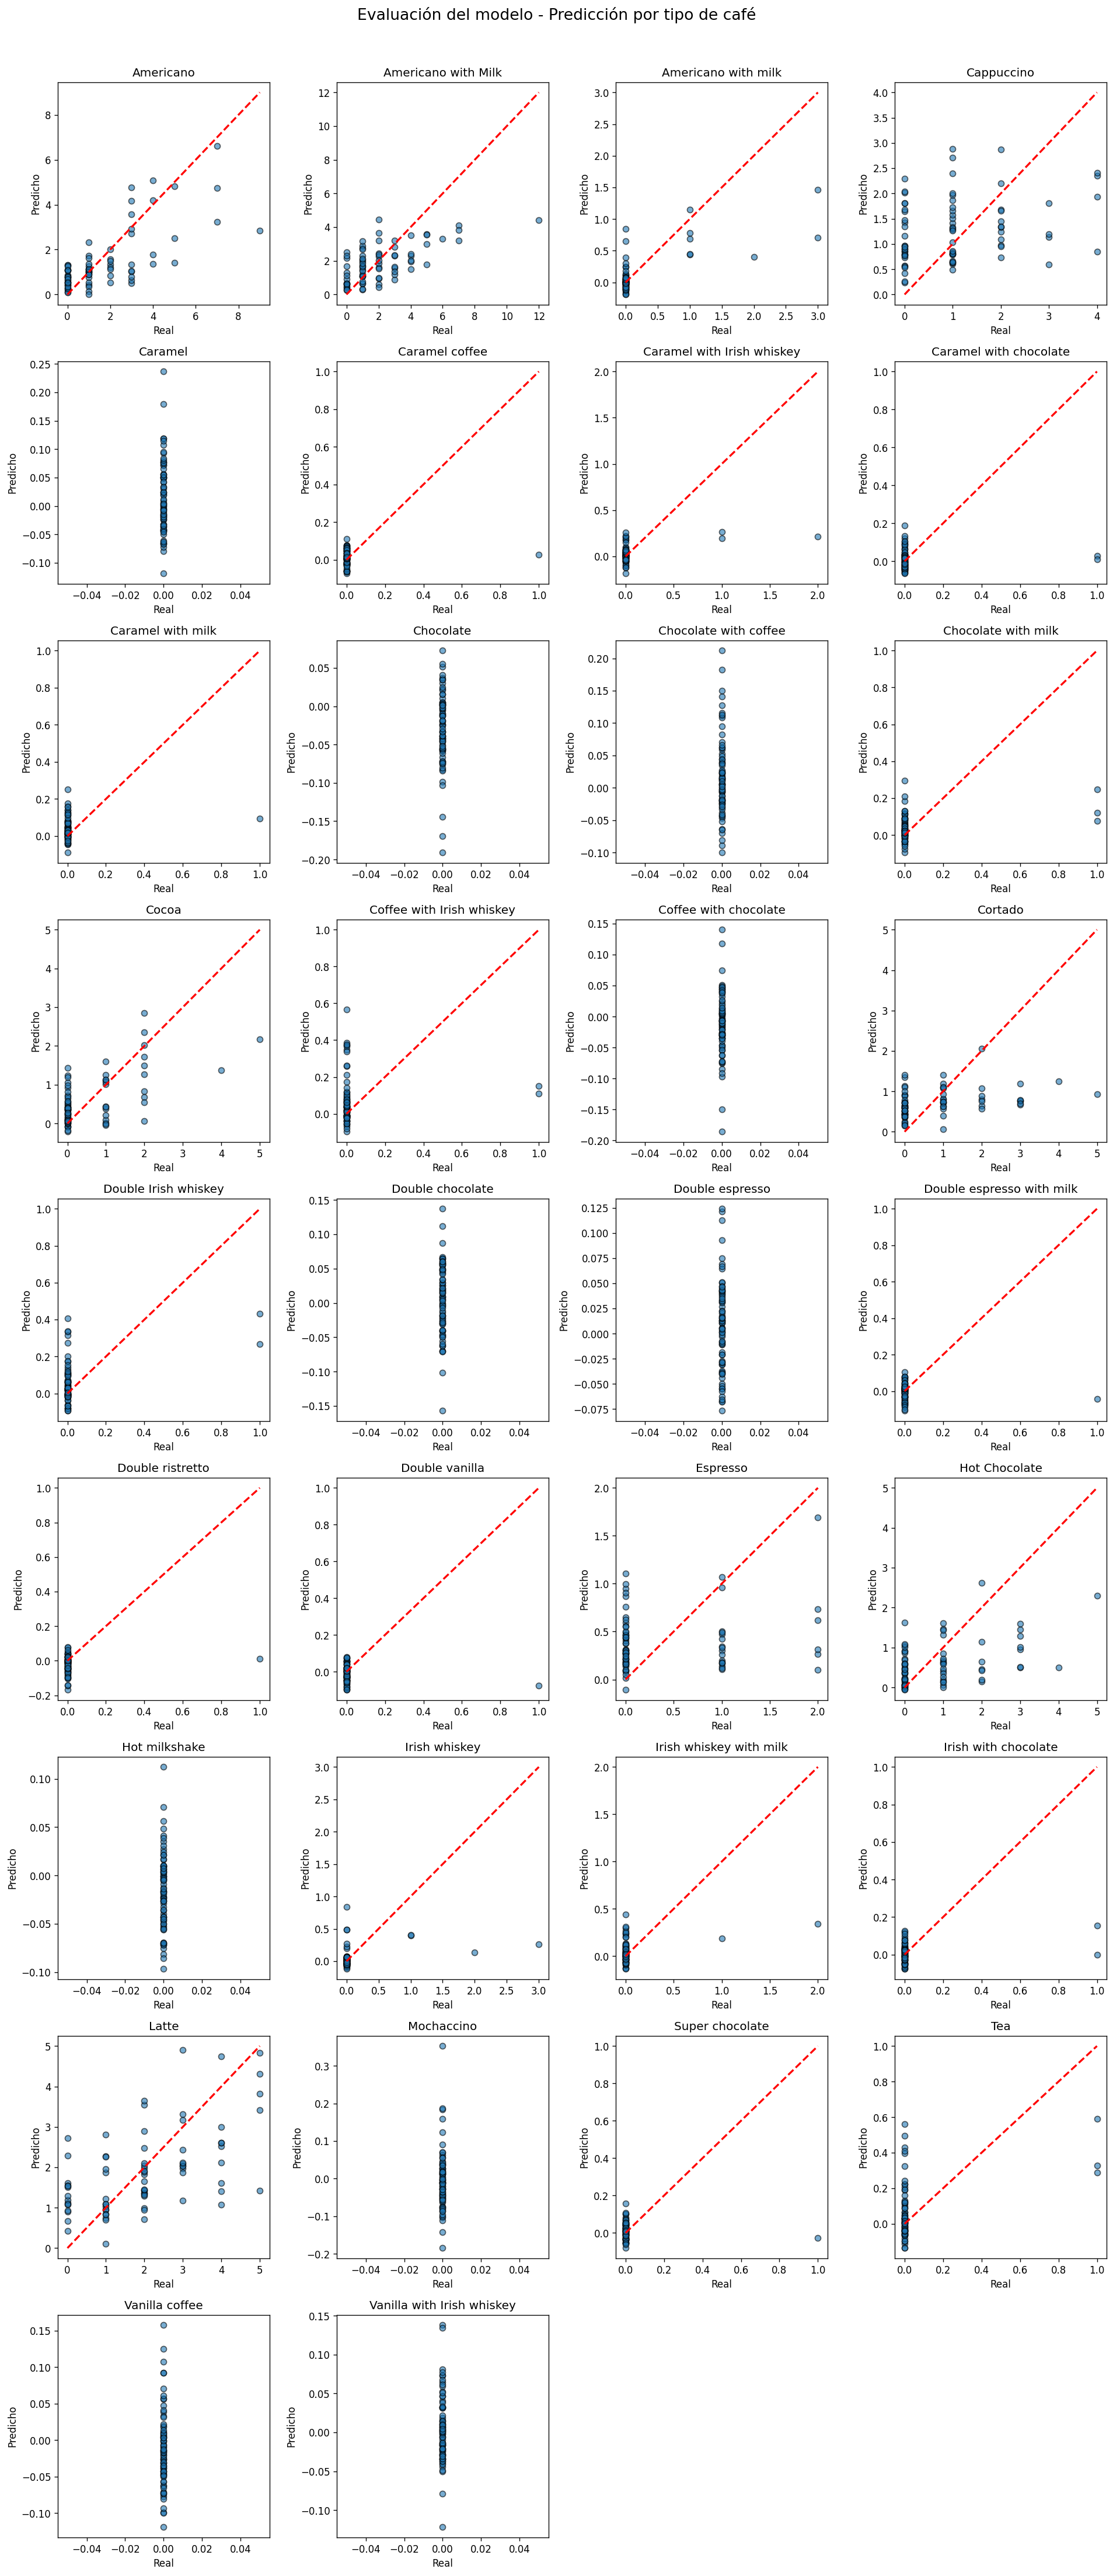

In [ ]:
import matplotlib.pyplot as plt
import math

# Número de tipos de café
n_cafes = len(coffee_cols)

# Calcular número de filas y columnas para el grid
cols = 4
rows = math.ceil(n_cafes / cols)

plt.figure(figsize=(4 * cols, 4 * rows))

for i, col in enumerate(coffee_cols):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.6, edgecolor='k')
    plt.plot([y_test[col].min(), y_test[col].max()],
             [y_test[col].min(), y_test[col].max()], 'r--', lw=2)
    plt.title(f"{col}")
    plt.xlabel("Real")
    plt.ylabel("Predicho")
    plt.tight_layout()

plt.suptitle("Evaluación del modelo - Predicción por tipo de café", fontsize=16, y=1.02)
plt.show()



